In [120]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Leemos los archivos de datos

In [121]:


# Ruta relativa a la carpeta de datos
data_path = Path("..") / "data"

# Cargar archivos .dat con rutas portables
df_DIV = pd.read_csv(data_path / 'IKZ2_DCV_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_B   = pd.read_csv(data_path / 'IKZ2_LCV_LEDblanco_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_M   = pd.read_csv(data_path / 'IKZ2_LCV_LEDmagenta_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_R   = pd.read_csv(data_path / 'IKZ2_LCV_LEDRojo_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_V   = pd.read_csv(data_path / 'IKZ2_LCV_LEDverde_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_A   = pd.read_csv(data_path / 'IKZ2_LCV_LEDazul_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')
df_Ir  = pd.read_csv(data_path / 'IKZ2_LCV_LEDinfrarrojoD6b_10mW_01.dat', sep='\t', decimal='.', skiprows=9, encoding='latin1')


### Creamos diccionarios para los datasets

In [122]:
# Diccionarios con los df
datasets = {
    'Oscuridad': df_DIV,
    'LED 1': df_B,
    'LED 2': df_R,
    'LED 3': df_M,
    'LED 4': df_A,
    'LED 5': df_V,
    'LED 6': df_Ir
}

# Diccionario de colores
colores_led = {
    'Oscuridad': 'black',
    'LED 1': 'gray',
    'LED 2': 'red',
    'LED 3': 'magenta',
    'LED 4': 'blue',
    'LED 5': 'green',
    'LED 6': 'brown'
}

### Creamos la carpeta de archivos EIS

In [123]:
# Carpeta de salida para los datos Z',Z'',Freq
carpeta = Path('..')/'data'/'Datos_EIS'
os.makedirs(carpeta, exist_ok=True)

# Diagrama de Nyquist

### Definimos las funiones necearias

In [124]:
# Función para sacar la impedancia real e imaginaria
def sacar_impedancias(df):
    # Calculo de Zprima y Z2prima
    zprima = df['Rp(Ohm)']/(1+(df['Rp(Ohm)']*2*m.pi*df['FRECUENCIA(Hz)']*df['Cp(F)'])**2)
    z2prima = ((df['Rp(Ohm)'])**2*2*m.pi*df['FRECUENCIA(Hz)']*df['Cp(F)'])/(1+(df['Rp(Ohm)']*2*m.pi*df['FRECUENCIA(Hz)']*df['Cp(F)'])**2)
    return zprima,z2prima

In [125]:
# Función para escribir los archivos de datos EIS
def archivo_eis(key, valor_vbias, zprima, z2prima, df):
    # Filtrar los datos donde z2prima > 0
    datos_filtrados = [(zp, z2, freq) for zp, z2, freq in zip(zprima, z2prima, df['FRECUENCIA(Hz)']) if z2 > 0]
    
    # Contar el número de puntos que cumplen la condición
    puntos = len(datos_filtrados)
    
    # Generar el nombre del archivo
    nombre_archivo = f'IKZ2_LED_{key}_{valor_vbias}V.txt'
    ruta_archivo_salida = os.path.join(carpeta, nombre_archivo)
    
    # Escribir los datos en el archivo
    with open(ruta_archivo_salida, 'w') as arch_eis:
        # Escribir el número de puntos en la primera línea
        arch_eis.write(f'{puntos}\n')
        
        # Escribir los datos filtrados
        for zp, z2, freq in datos_filtrados:
            arch_eis.write(f'{zp} {z2} {freq}\n')


### Representamos para todos los LED

In [126]:
for key, df in datasets.items():
    # Elegir los valores de Vbias que queremos representar
    Vmin = -2
    Vmax = 2
    df_filtrado = df[(df['Vbias(V)']>=Vmin)&(df['Vbias(V)']<=Vmax)]
    grupos_vbias = df_filtrado.groupby('Vbias(V)')
    for valor_vbias, grupo in grupos_vbias:
        # Calculo de Zprima y Z2prima
        zprima,z2prima = sacar_impedancias(grupo)
        # Representación
        if key == 'Infrarrojo':
            plt.figure(1,figsize=(9, 6))
            plt.plot(zprima,z2prima,'o-',label = f'Vbias = {valor_vbias}V')
            plt.xlabel(r'Z´ ($\Omega$)',fontsize=15)
            plt.ylabel(r'-Z´´ ($\Omega$)',fontsize=15)
            plt.title(f'Diagrama de Nyquist para el LED {key}',fontsize = 15)
            plt.legend()
            plt.tick_params(axis='both', which='major', labelsize=15)
            # Añadir frecuencia a cada punto (solo para pocos puntos)
            """ for zp, z2, freq in zip(zprima, z2prima, grupo['FRECUENCIA']):
                plt.text(zp, z2, f'{freq:.1f}', fontsize=8, color='blue', ha='right', va='bottom') """
            
        archivo_eis(key, valor_vbias, zprima, z2prima, grupo)
    
        
    plt.show() 

# Curvas CV

In [127]:
errV = 0.05

In [128]:
df_DIV

,Vbias(V),Cp(F),Rp(Ohm),FRECUENCIA(Hz),Vrms(V)
0,-1.50,9.605600e-08,4733.0,20.0,0.02
1,-1.45,9.973900e-08,4921.0,20.0,0.02
2,-1.40,9.869500e-08,5100.0,20.0,0.02
3,-1.35,9.540900e-08,5271.0,20.0,0.02
4,-1.30,1.014210e-07,5419.0,20.0,0.02
...,...,...,...,...,...
2494,0.00,0.000000e+00,0.0,0.0,0.00
2495,0.00,0.000000e+00,0.0,0.0,0.00
2496,0.00,0.000000e+00,0.0,0.0,0.00
2497,0.00,0.000000e+00,0.0,0.0,0.00


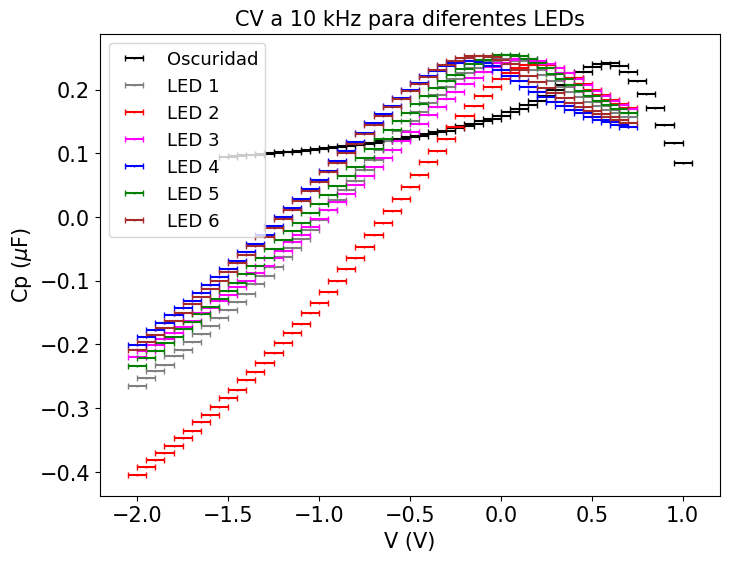

In [129]:
for key, df in datasets.items():    
    freq = 10000
    df_freq = df[df['FRECUENCIA(Hz)']==freq]
    color_led = colores_led.get(key,'k')
    plt.figure(1,figsize=(8,6))
    plt.errorbar(df_freq['Vbias(V)'],df_freq['Cp(F)']*1e6,xerr=errV,marker='.',markersize = 1, linestyle=' ', color=color_led, label = key, capsize=2.5, capthick=1)
    plt.title(rf'CV a {int(freq/1000)} kHz para diferentes LEDs', fontsize=15)
    plt.ylabel(r'Cp ($\mu$F)',fontsize=15)
    plt.xlabel('V (V)',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.legend(loc = 'upper left',fontsize = 13)
    #plt.show()
plt.show()

# Cálculo del número de portadores

### Calculamos y representamos 1/Cp^2 frente a V

In [130]:
for key, df in datasets.items():
    df['1/Cp2'] = 1/(df['Cp(F)']**2)

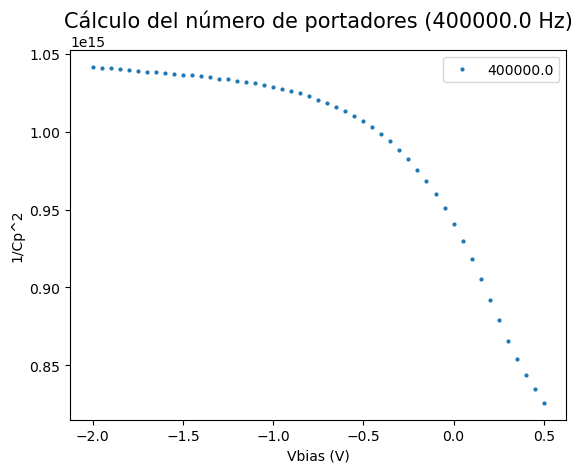

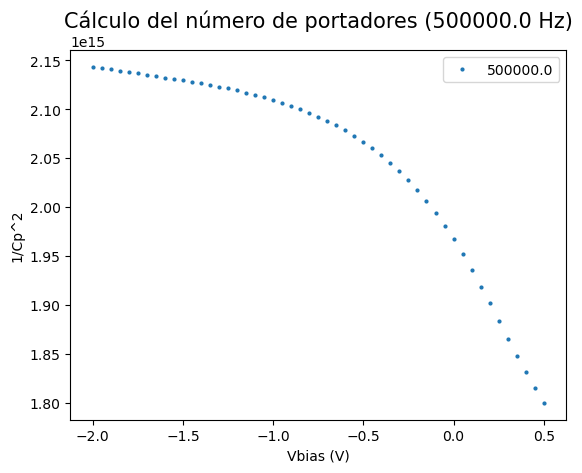

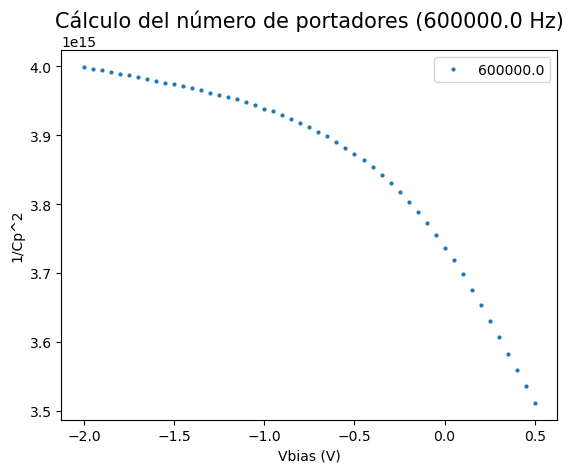

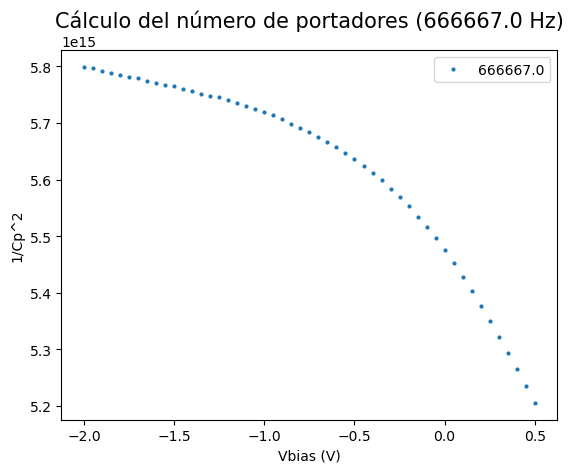

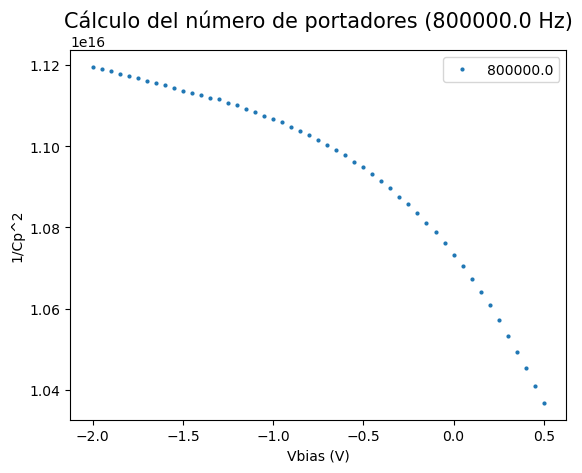

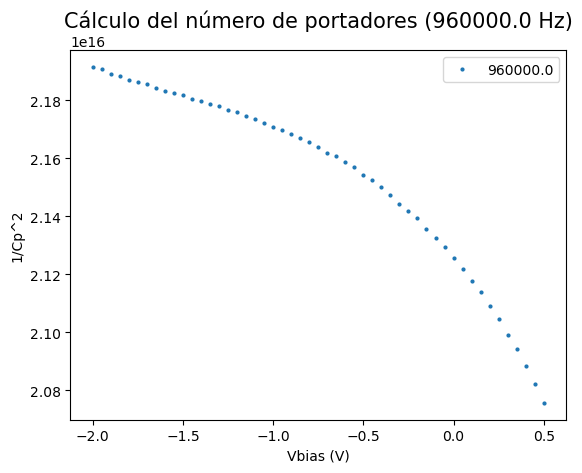

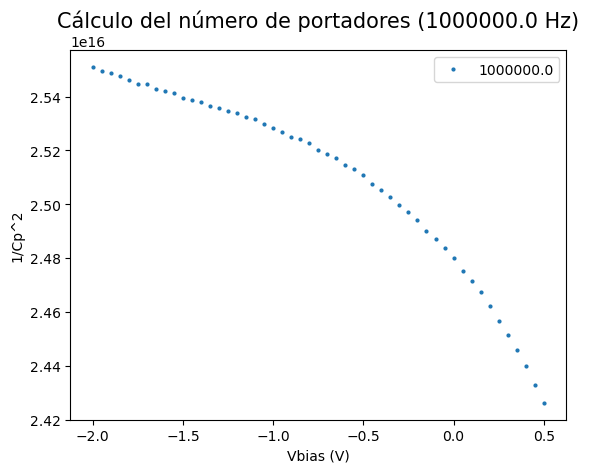

In [131]:
df_filt = df_R[(df_R['FRECUENCIA(Hz)']>=400000)&(df_R['FRECUENCIA(Hz)']<=70000000)]
grupo_freqs = df_filt['FRECUENCIA(Hz)'].unique()
for frecuencia in grupo_freqs:
    #df_filtro = df_R[(df_R['FRECUENCIA(Hz)']==frecuencia)&(df_R['Vbias(V)']<=-1)]
    df_filtro = df_R[(df_R['FRECUENCIA(Hz)']==frecuencia)&(df_R['Vbias(V)']>=-2)&(df_R['Vbias(V)']<=0.5)]
    plt.figure()
    plt.plot(df_filtro['Vbias(V)'],df_filtro['1/Cp2'],marker='o',markersize = 2, linestyle='',label=frecuencia)
    plt.title(f'Cálculo del número de portadores ({frecuencia} Hz)',fontsize = 15)
    plt.ylabel('1/Cp^2')
    plt.xlabel('Vbias (V)')
    plt.legend()
    # plt.axis([-2, 0.8, 0, 10e14])


### Cálculo del número de portadores

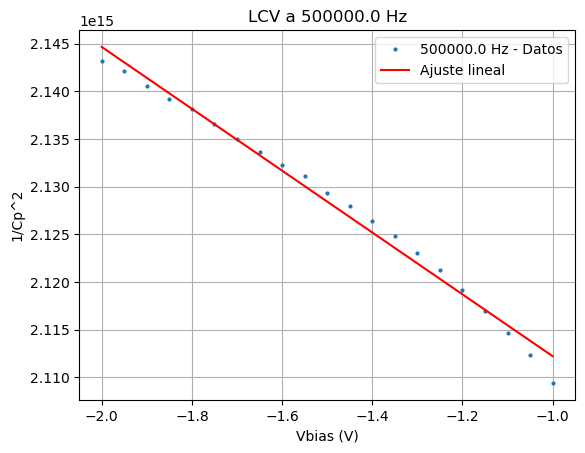

v_bi =  64.12937604589807
Pendientes calculadas y sus errores:

Oscuridad:
  Frecuencia 500000.0 Hz: Pendiente = -6.8046e+15 ± 5.3025e+14

LED 1:
  Frecuencia 500000.0 Hz: Pendiente = -4.3598e+13 ± 1.1892e+12

LED 2:
  Frecuencia 500000.0 Hz: Pendiente = -3.2431e+13 ± 8.0652e+11

LED 3:
  Frecuencia 500000.0 Hz: Pendiente = -3.9066e+13 ± 9.6490e+11

LED 4:
  Frecuencia 500000.0 Hz: Pendiente = -5.5217e+13 ± 1.7151e+12

LED 5:
  Frecuencia 500000.0 Hz: Pendiente = -4.1657e+13 ± 1.1092e+12

LED 6:
  Frecuencia 500000.0 Hz: Pendiente = -5.0407e+13 ± 1.5110e+12


In [132]:
import numpy as np
import matplotlib.pyplot as plt

pendientes = {}  # Diccionario para almacenar las pendientes y sus errores
v_bi = {}
for key, df in datasets.items():
    if key != 'D':
        # Filtrar frecuencias y definir el diccionario para almacenar las pendientes
        df_filt = df[(df['FRECUENCIA(Hz)'] >= 500000) & (df['FRECUENCIA(Hz)'] <= 500000)]
        grupo_freqs = df_filt['FRECUENCIA(Hz)'].unique()
        
        pendientes[key] = {}
        v_bi[key] = {}

        # Bucle para cada frecuencia
        for frecuencia in grupo_freqs:
            # Filtrar los datos para la frecuencia actual
            df_filtro = df[(df['FRECUENCIA(Hz)'] == frecuencia) & (df['Vbias(V)'] >= -2) & (df['Vbias(V)'] <= -1)]
            
            # Extraer las variables independientes (Vbias) y dependientes (1/Cp2)
            x = df_filtro['Vbias(V)']
            y = df_filtro['1/Cp2']
            
            # Realizar el ajuste lineal con la matriz de covarianza
            coef, cov_matrix = np.polyfit(x, y, 1, cov=True)  # Ajuste lineal y = mx + b
            pend, intercepto = coef
            error_pend = np.sqrt(cov_matrix[0, 0])  # Error de la pendiente
            
            # Guardar la pendiente y el error en el diccionario
            pendientes[key][frecuencia] = {'pendiente': pend, 'error': error_pend}
            v_bi[key][frecuencia] = {'v_bi':-(intercepto/pend)}
            # Crear la recta de ajuste
            y_ajuste = np.polyval(coef, x)
            if key == 'LED 2':
                # Graficar los datos y la recta de ajuste
                plt.figure()
                plt.plot(x, y, marker='o', markersize=2, linestyle='', label=f'{frecuencia} Hz - Datos')
                plt.plot(x, y_ajuste, linestyle='-', color='red', label='Ajuste lineal')
                plt.title(f'LCV a {frecuencia} Hz')
                plt.ylabel('1/Cp^2')
                plt.xlabel('Vbias (V)')
                plt.legend()
                plt.grid(True)
                plt.show()
                print('v_bi = ',-intercepto/pend)

# Mostrar las pendientes calculadas junto con sus errores
print("Pendientes calculadas y sus errores:")
for key, freqs in pendientes.items():
    print(f"\n{key}:")
    for freq, datos in freqs.items():
        print(f"  Frecuencia {freq} Hz: Pendiente = {datos['pendiente']:.4e} ± {datos['error']:.4e}")


In [133]:

# pendientes = {}  # Diccionario para almacenar las pendientes
# for key,df in datasets.items():
#     if key!='D':
#         # Filtrar frecuencias y definir el diccionario para almacenar las pendientes
#         df_filt = df[(df['FRECUENCIA(Hz)'] >= 400000) & (df['FRECUENCIA(Hz)'] == 1000000)]
#         grupo_freqs = df_filt['FRECUENCIA(Hz)'].unique()
        
#         pendientes[key] = {}

#         # Bucle para cada frecuencia
#         for frecuencia in grupo_freqs:
#             # Filtrar los datos para la frecuencia actual
#             df_filtro = df[(df['FRECUENCIA(Hz)'] == frecuencia) & (df['Vbias(V)'] >= -2) & (df['Vbias(V)'] <= -1.3)]
            
#             # Extraer las variables independientes (Vbias) y dependientes (1/Cp2)
#             x = df_filtro['Vbias(V)']
#             y = df_filtro['1/Cp2']
            
#             # Realizar el ajuste lineal
#             coef = np.polyfit(x, y, 1)  # Ajuste lineal y = mx + b
#             pend, intercepto = coef
            
#             # Guardar la pendiente en el diccionario
#             pendientes[key][frecuencia] = pend
            
#             # Crear la recta de ajuste
#             y_ajuste = np.polyval(coef, x)
#             if key=='Rojo':
#                 # Graficar los datos y la recta de ajuste
#                 plt.figure()
#                 plt.plot(x, y, marker='o', markersize=2, linestyle='', label=f'{frecuencia} Hz - Datos')
#                 plt.plot(x, y_ajuste, linestyle='-', color='red', label='Ajuste lineal')
#                 plt.title(f'LCV a {frecuencia} Hz')
#                 plt.ylabel('1/Cp^2')
#                 plt.xlabel('Vbias (V)')
#                 plt.legend()
#                 plt.grid(True)
#                 plt.show()

# # Mostrar las pendientes calculadas
# print("Pendientes calculadas:")
# for key, freqs in pendientes.items():
#     print(f"\n{key}:")
#     for freq, pendiente in freqs.items():
#         print(f"  Frecuencia {freq} Hz: Pendiente = {pendiente:.4e}")


In [134]:
pendientes

{'Oscuridad': {500000.0: {'pendiente': -6804571665628506.0,
   'error': 530254149037745.44}},
 'LED 1': {500000.0: {'pendiente': -43598066856751.586,
   'error': 1189233721203.2378}},
 'LED 2': {500000.0: {'pendiente': -32431259756956.176,
   'error': 806522850568.0247}},
 'LED 3': {500000.0: {'pendiente': -39065608003944.92,
   'error': 964895800360.0509}},
 'LED 4': {500000.0: {'pendiente': -55217445091459.8,
   'error': 1715141304392.9204}},
 'LED 5': {500000.0: {'pendiente': -41657312500967.836,
   'error': 1109193401007.9375}},
 'LED 6': {500000.0: {'pendiente': -50406935019137.125,
   'error': 1510987797168.7253}}}

In [135]:
import numpy as np

# Crear un diccionario para almacenar los resultados del número de portadores
N_portadores = {}

# Constantes
q = 1.6e-19  # Carga del electrón (C)
e_0 = 1.034e-12  # Permitividad eléctrica (F/m)
A = 4  # Área (cm^2) — ajusta este valor si es diferente

# Calcular N_portadores para cada conjunto de datos y frecuencia
for key, freqs in pendientes.items():
    N_portadores[key] = {}  # Crear un subdiccionario para cada key
    for freq, m in freqs.items():
        N_portadores[key][freq] = 2 / (q * e_0 * (A**2) * (-m['pendiente']))

# Diccionario para almacenar la media y desviación típica
N_stats = {}

for key, N_port in N_portadores.items():
    valores = list(N_port.values())
    
    # Calcular la media
    media = np.mean(valores)
    
    # Calcular la desviación típica
    desviacion = np.std(valores)
    
    # Almacenar resultados en el diccionario
    N_stats[key] = {'media': media, 'desviacion': desviacion}

# Ejemplo de cómo acceder a los resultados
for key, stats in N_stats.items():
    print(f"{key}: Media = {stats['media']:.2e}, Desviación típica = {stats['desviacion']:.2e}")


Oscuridad: Media = 1.11e+14, Desviación típica = 0.00e+00
LED 1: Media = 1.73e+16, Desviación típica = 0.00e+00
LED 2: Media = 2.33e+16, Desviación típica = 0.00e+00
LED 3: Media = 1.93e+16, Desviación típica = 0.00e+00
LED 4: Media = 1.37e+16, Desviación típica = 0.00e+00
LED 5: Media = 1.81e+16, Desviación típica = 0.00e+00
LED 6: Media = 1.50e+16, Desviación típica = 0.00e+00


In [136]:
import numpy as np

# Crear un diccionario para almacenar los resultados del número de portadores
N_portadores = {}

# Constantes
q = 1.6e-19  # Carga del electrón (C)
e_0 = 1.034e-12  # Permitividad eléctrica (F/m)
A = 4  # Área (cm^2) — ajusta este valor si es diferente

# Calcular N_portadores y su error para cada conjunto de datos y frecuencia
for key, freqs in pendientes.items():
    N_portadores[key] = {}  # Crear un subdiccionario para cada key
    for freq, datos in freqs.items():
        m = datos['pendiente']
        error_m = datos['error']
        
        # Calcular el número de portadores
        N = 2 / (q * e_0 * (A**2) * (-m))
        
        # Calcular el error del número de portadores usando propagación de errores
        error_N = np.abs((2 / (q * e_0 * (A**2))) * (1 / m**2) * error_m)
        
        # Almacenar los resultados en el diccionario
        N_portadores[key][freq] = {'N': N, 'error_N': error_N}

# Calcular la media del número de portadores y su error
N_mean = {}
N_error_mean = {}

for key, N_port in N_portadores.items():
    N_values = [v['N'] for v in N_port.values()]
    N_errors = [v['error_N'] for v in N_port.values()]
    
    # Calcular la media del número de portadores
    N_mean[key] = np.mean(N_values)
    
    # Calcular el error de la media como la raíz cuadrada de la suma de los cuadrados de los errores
    N_error_mean[key] = np.sqrt(np.sum(np.array(N_errors)**2)) / len(N_errors)

# Mostrar los resultados
print("Media del número de portadores y su error:")
for key in N_mean.keys():
    print(f"{key}: N_mean = {N_mean[key]:.4e} ± {N_error_mean[key]:.4e}")


Media del número de portadores y su error:
Oscuridad: N_mean = 1.1104e+14 ± 8.6527e+12
LED 1: N_mean = 1.7330e+16 ± 4.7272e+14
LED 2: N_mean = 2.3297e+16 ± 5.7937e+14
LED 3: N_mean = 1.9341e+16 ± 4.7771e+14
LED 4: N_mean = 1.3683e+16 ± 4.2503e+14
LED 5: N_mean = 1.8138e+16 ± 4.8294e+14
LED 6: N_mean = 1.4989e+16 ± 4.4931e+14


In [137]:
# # Crear un diccionario para almacenar los resultados del número de portadores
# N_portadores = {}

# # Constantes
# q = 1.6e-19  # Carga del electrón (C)
# e_0 = 1.034e-12  # Permitividad eléctrica (F/m)
# A = 4  # Área (cm^2) — ajusta este valor si es diferente

# # Calcular N_protadores para cada conjunto de datos y frecuencia
# for key, freqs in pendientes.items():
#     N_portadores[key] = {}  # Crear un subdiccionario para cada key
#     for freq, m in freqs.items():
#         N_portadores[key][freq] = 2 / (q * e_0 * (A**2) * (-m))

# N_mean = {}
# for key,N_port in N_portadores.items():

#     N_mean[key] = np.mean(list(N_port.values()))  
# N_mean

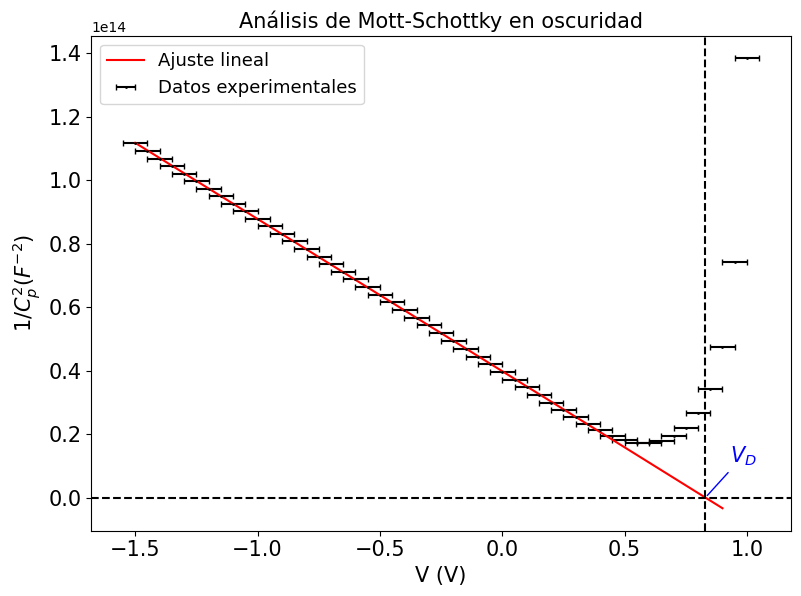

Pendiente del ajuste lineal: -4.80e+13
v_bi 0.8301491315556658


In [138]:
import numpy as np
frec = 10000
data_filt = df_DIV[df_DIV['FRECUENCIA(Hz)']==frec]

# Filtrar los datos dentro del rango de Vbias [0.00, 0.35]
rango = data_filt[(data_filt['Vbias(V)'] >= -1.5) & (data_filt['Vbias(V)'] <= 0)]

# Realizar el ajuste lineal
coeficientes = np.polyfit(rango['Vbias(V)'], rango['1/Cp2'], 1)  # Grado 1 para ajuste lineal
pendiente, interseccion = coeficientes

# Generar la recta de ajuste
vbias_ajuste = np.linspace(-1.5, 0.9, 100)  # Valores de Vbias para la recta de ajuste
ajuste_lineal = pendiente * vbias_ajuste + interseccion
v_bi = -interseccion/pendiente
# Graficar los datos y la recta de ajuste
plt.figure(figsize=(8, 6))

# Graficar los puntos originales
plt.errorbar(data_filt['Vbias(V)'], data_filt['1/Cp2'],xerr=errV, marker='.', markersize=2, linestyle='', color='k', label='Datos experimentales',capsize=2.5, capthick=1)

# Graficar la recta de ajuste
plt.plot(vbias_ajuste, ajuste_lineal, color='red', linestyle='-', label='Ajuste lineal')

# Configuración de la gráfica
plt.title(f'Análisis de Mott-Schottky en oscuridad',fontsize = 15)
plt.ylabel(r'$1/C_p^2 (F^{-2})$',fontsize = 15)
plt.xlabel('V (V)',fontsize = 15)
plt.legend(loc='upper left',fontsize = 13)
# plt.grid(True)
plt.tight_layout()
plt.axhline(0, color='k', ls = '--')
plt.axvline(v_bi,color='k',ls='--')
plt.tick_params(axis='both', which='major', labelsize=15)
# Etiqueta en v_bi
plt.annotate(
    f'$V_{{D}}$',
    xy=(v_bi, 0), xycoords='data',
    xytext=(v_bi + 0.1, max(ajuste_lineal) * 0.1),
    textcoords='data',
    arrowprops=dict(arrowstyle="-", color='blue'),
    fontsize=15, color='blue'
)

# Mostrar la gráfica
plt.show()

# Imprimir la pendiente
print(f'Pendiente del ajuste lineal: {pendiente:.2e}')
print('v_bi',-interseccion/pendiente)

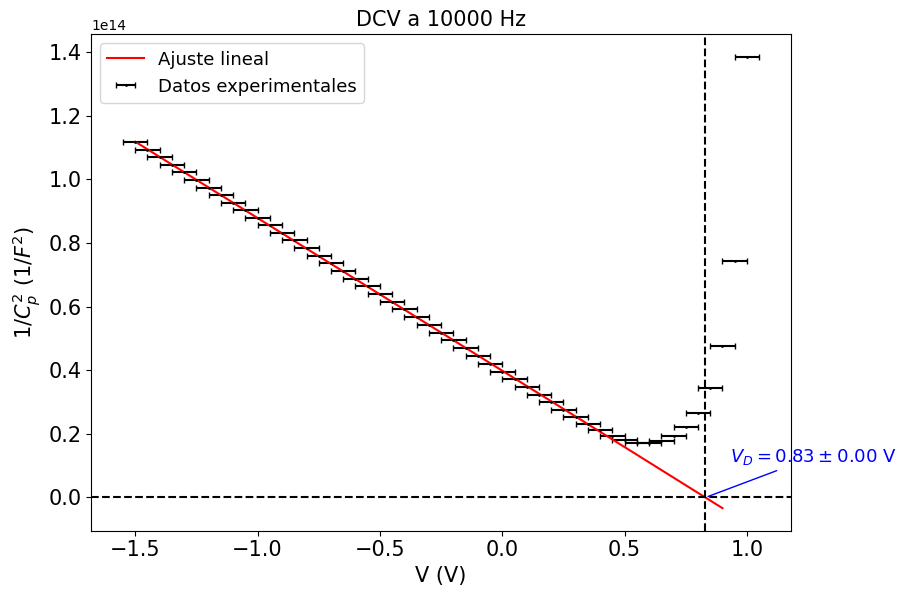

Pendiente: -4.799e+13 ± 5.6e+10
Intersección: 3.984e+13 ± 4.9e+10
V_D: 0.830 ± 0.001 V


In [139]:
import numpy as np
import matplotlib.pyplot as plt

frec = 10000
data_filt = df_DIV[df_DIV['FRECUENCIA(Hz)'] == frec]

# Filtrar los datos dentro del rango de Vbias [-1.5, 0]
rango = data_filt[(data_filt['Vbias(V)'] >= -1.5) & (data_filt['Vbias(V)'] <= 0)]

# Ajuste lineal con matriz de covarianza
coeficientes, cov = np.polyfit(rango['Vbias(V)'], rango['1/Cp2'], 1, cov=True)
pendiente, interseccion = coeficientes
error_pendiente, error_interseccion = np.sqrt(np.diag(cov))

# Calcular V_D y su error
v_bi = -interseccion / pendiente
# Propagación de errores: ΔV_D = sqrt((dV_D/dm * Δm)^2 + (dV_D/db * Δb)^2)
# Donde V_D = -b/m
error_v_bi = np.sqrt(
    (error_interseccion / pendiente)**2 +
    (interseccion * error_pendiente / pendiente**2)**2
)

# Graficar
vbias_ajuste = np.linspace(-1.5, 0.9, 100)
ajuste_lineal = pendiente * vbias_ajuste + interseccion

plt.figure(figsize=(8, 6))
plt.errorbar(data_filt['Vbias(V)'], data_filt['1/Cp2'], xerr=errV, marker='.', markersize=2,
             linestyle='', color='k', label='Datos experimentales', capsize=2.5, capthick=1)
plt.plot(vbias_ajuste, ajuste_lineal, color='red', linestyle='-', label='Ajuste lineal')

plt.title(f'DCV a {frec} Hz', fontsize=15)
plt.ylabel(r'$1/C_p^2\ (1/F^2)$', fontsize=15)
plt.xlabel('V (V)', fontsize=15)
plt.legend(loc='upper left', fontsize=13)
# plt.grid(True)
plt.tight_layout()
plt.axhline(0, color='k', ls='--')
plt.axvline(v_bi, color='k', ls='--')
plt.tick_params(axis='both', which='major', labelsize=15)

# Etiqueta de V_D con flecha
plt.annotate(
    f'$V_{{D}} = {v_bi:.2f} \pm {error_v_bi:.2f}$ V',
    xy=(v_bi, 0), xycoords='data',
    xytext=(v_bi + 0.1, max(ajuste_lineal) * 0.1),
    textcoords='data',
    arrowprops=dict(arrowstyle="-", color='blue'),
    fontsize=13, color='blue'
)

plt.show()

# Imprimir resultados
print(f"Pendiente: {pendiente:.3e} ± {error_pendiente:.1e}")
print(f"Intersección: {interseccion:.3e} ± {error_interseccion:.1e}")
print(f"V_D: {v_bi:.3f} ± {error_v_bi:.3f} V")


In [140]:
# Constantes
q = 1.6e-19         # C
epsilon = 1.034e-12 # F/m
A = 4               # Área en mm^2 (o en unidades coherentes con ε)
dA = 0.05            # Error en el área (por ejemplo)
m = pendiente       # Pendiente (negativa)
dm = error_pendiente  # Error en la pendiente

# Cálculo del número de portadores
N_portadores = 2 / (q * epsilon * A**2 * -m)

# Derivadas parciales
dN_dm = 2 / (q * epsilon * A**2 * m**2)
dN_dA = -4 / (q * epsilon * A**3 * m)

# Error total propagado
error_N = np.sqrt((dN_dm * dm)**2 + (dN_dA * dA)**2)

# Mostrar resultado
print(f"Número de portadores: {N_portadores:.3e} ± {error_N:.2e} cm⁻³")


Número de portadores: 1.575e+16 ± 3.94e+14 cm⁻³


## Simulador solar

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, e
from scipy.stats import linregress


In [142]:

# Ruta del archivo
ruta = r"C:\Users\Alfonso\Downloads\TFG FA_A\LCV_1_C2_V.txt"

# Leer el archivo como tabla con separador por tabulador
df = pd.read_csv(ruta, sep='\t', encoding='latin1',skiprows=1)  # por si tiene cabeceras no estándar


In [143]:

# Renombrar columnas si es necesario (depende del formato)
df.columns = ['V', 'C_inv2']  # V en Voltios, C^-2 en µF^-2
# Convertir C^-2 a F^-2 (de µF^-2 a F^-2)
df['C_inv2_F'] = df['C_inv2'] * 1e12  # (µF^-2) × (1e12) = F^-2


Densidad de portadores (N_D): -1.44e+16 cm⁻³


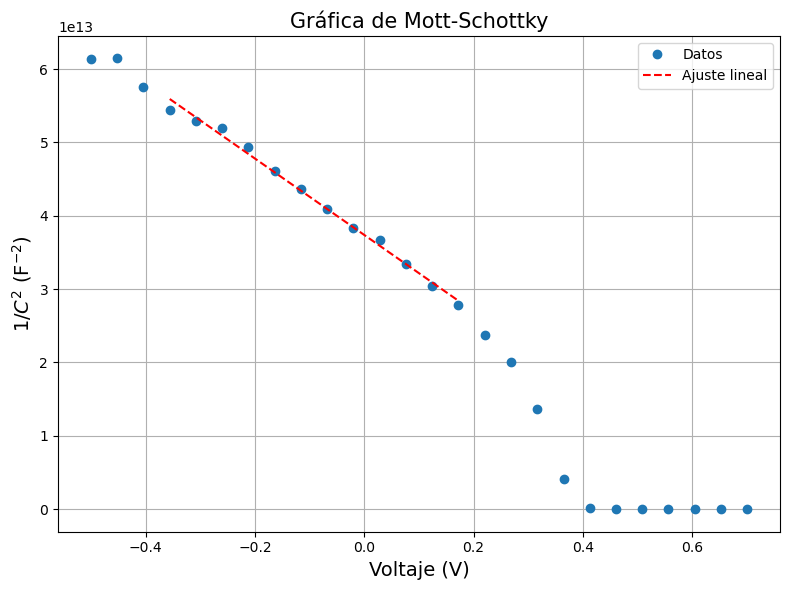

In [144]:



# Seleccionar región lineal manualmente (ajustar rango si es necesario)
df_lineal = df[(df['V'] >= -0.4) & (df['V'] <= 0.2)]  # AJUSTA este rango si hace falta

# Ajuste lineal
slope, intercept, r_value, _, _ = linregress(df_lineal['V'], df_lineal['C_inv2_F'])

# Parámetros físicos
eps_r = 11.7   # permitividad relativa (ajusta para tu material)
A = 4.0        # área del electrodo en cm² (ajusta si lo sabes)
A_m2 = A * 1e-4  # convertir a m²

# Cálculo de densidad de portadores (N_D) con ecuación de Mott-Schottky
# slope = 2 / (q * ε * ε0 * A² * N_D)
ND = 2 / (slope * e * epsilon_0 * eps_r * A_m2**2)  # en m^-3
ND_cm3 = ND / 1e6  # convertir a cm^-3

# Mostrar resultado
print(f"Densidad de portadores (N_D): {ND_cm3:.2e} cm⁻³")

# Representación gráfica
plt.figure(figsize=(8, 6))
plt.plot(df['V'], df['C_inv2_F'], 'o', label='Datos')
plt.plot(df_lineal['V'], slope * df_lineal['V'] + intercept, 'r--', label='Ajuste lineal')
plt.xlabel('Voltaje (V)', fontsize=14)
plt.ylabel(r'$1/C^2$ (F$^{-2}$)', fontsize=14)
plt.title('Gráfica de Mott-Schottky', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


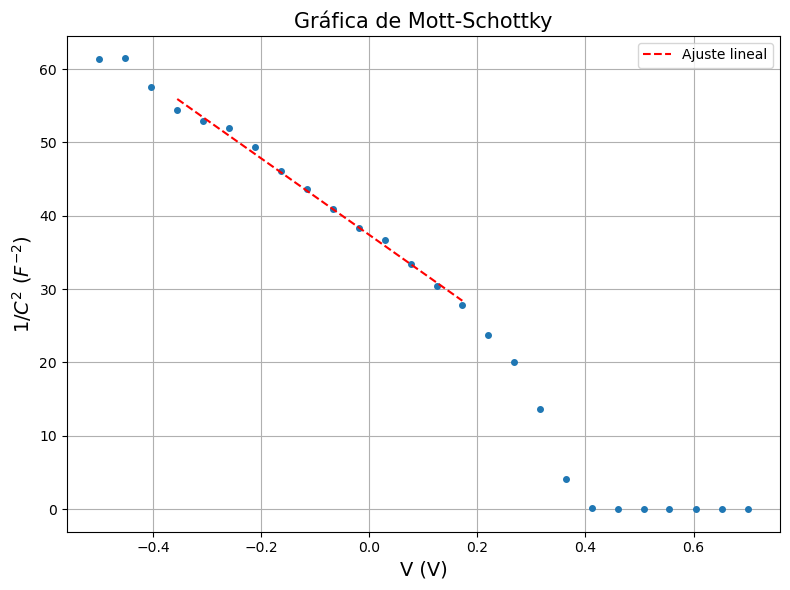

Pendiente: -5.21e+01 F⁻²/V
Intersección (b): 3.74e+01 F⁻²
Tensión de banda plana V_fb: 0.717 V
Concentración de portadores: -2.70e+21 cm⁻³


In [145]:

# Graficar 1/C² vs V
plt.figure(figsize=(8,6))
plt.plot(df['V'], df['C_inv2'], 'o', markersize=4)
plt.xlabel('V (V)', fontsize=14)
plt.ylabel(r'$1/C^2$ ($F^{-2}$)', fontsize=14)
plt.title('Gráfica de Mott-Schottky', fontsize=15)
plt.grid(True)

# Seleccionar región lineal (ajustar rangos según datos)
region_lineal = df[(df['V'] > -0.4) & (df['V'] < 0.2)]

# Ajuste lineal
coef = np.polyfit(region_lineal['V'], region_lineal['C_inv2'], 1)
m, b = coef
fit_line = np.poly1d(coef)

# Dibujar ajuste lineal
plt.plot(region_lineal['V'], fit_line(region_lineal['V']), 'r--', label='Ajuste lineal')
plt.legend()
plt.tight_layout()
plt.show()

# Parámetros físicos
eps_r = 10         # Permisividad relativa (ajustar)
eps = epsilon_0 * eps_r
q = e

# Cálculo de concentración de portadores (N_D o N_A)
N = 2 / (q * eps * m)  # cm^-3
N = N / 1e6            # pasar a unidades de cm^-3

# Cálculo de Vfb (intersección con eje V)
V_fb = -b / m

# Mostrar resultados
print(f"Pendiente: {m:.2e} F⁻²/V")
print(f"Intersección (b): {b:.2e} F⁻²")
print(f"Tensión de banda plana V_fb: {V_fb:.3f} V")
print(f"Concentración de portadores: {N:.2e} cm⁻³")


In [146]:
df_sol = df.copy()

In [147]:
df_sol

,V,C_inv2,C_inv2_F
0,-0.499914,6.140150e+01,6.140150e+13
1,-0.451931,6.146410e+01,6.146410e+13
2,-0.403860,5.761630e+01,5.761630e+13
3,-0.355713,5.448140e+01,5.448140e+13
4,-0.308049,5.299290e+01,5.299290e+13
5,-0.259934,5.195290e+01,5.195290e+13
6,-0.211908,4.935310e+01,4.935310e+13
7,-0.163841,4.612240e+01,4.612240e+13
8,-0.115787,4.362240e+01,4.362240e+13
9,-0.068058,4.089740e+01,4.089740e+13


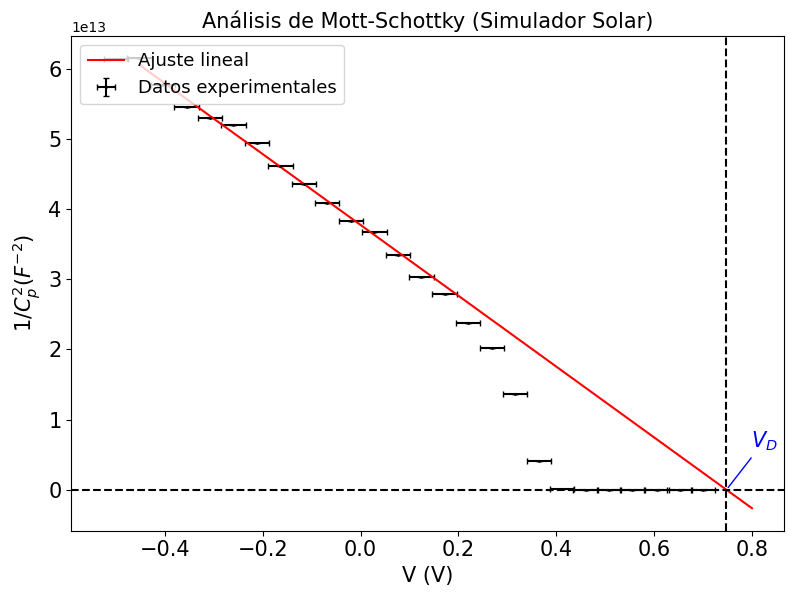

Pendiente del ajuste lineal: -5.05e+13
v_bi 0.7477788161524398


In [148]:

data_filt = df_sol
errV_sol = 0.025
errC = 0.01

# Filtrar los datos dentro del rango de Vbias [0.00, 0.35]
rango = data_filt[(data_filt['V'] >= -0.4) & (data_filt['V'] <= 0.1)]

# Realizar el ajuste lineal
coeficientes = np.polyfit(rango['V'], rango['C_inv2_F'], 1)  # Grado 1 para ajuste lineal
pendiente, interseccion = coeficientes

# Generar la recta de ajuste
vbias_ajuste = np.linspace(-0.45, 0.8, 100)  # Valores de Vbias para la recta de ajuste
ajuste_lineal = pendiente * vbias_ajuste + interseccion
v_bi = -interseccion/pendiente
# Graficar los datos y la recta de ajuste
plt.figure(figsize=(8, 6))

# Graficar los puntos originales
plt.errorbar(data_filt['V'], data_filt['C_inv2_F'],xerr=errV_sol,yerr=errC, marker='.', markersize=2, linestyle='', color='k', label='Datos experimentales',capsize=2.5, capthick=1)

# Graficar la recta de ajuste
plt.plot(vbias_ajuste, ajuste_lineal, color='red', linestyle='-', label='Ajuste lineal')

# Configuración de la gráfica
plt.title(f'Análisis de Mott-Schottky (Simulador Solar)',fontsize = 15)
plt.ylabel(r'$1/C_p^2 (F^{-2})$',fontsize = 15)
plt.xlabel('V (V)',fontsize = 15)
plt.legend(loc='upper left',fontsize = 13)
# plt.grid(True)
plt.tight_layout()
plt.axhline(0, color='k', ls = '--')
plt.axvline(v_bi,color='k',ls='--')
plt.tick_params(axis='both', which='major', labelsize=15)
# Etiqueta en v_bi
plt.annotate(
    f'$V_{{D}}$',
    xy=(v_bi, 0), xycoords='data',
    xytext=(v_bi + 0.05, max(ajuste_lineal) * 0.1),
    textcoords='data',
    arrowprops=dict(arrowstyle="-", color='blue'),
    fontsize=15, color='blue'
)

# Mostrar la gráfica
plt.show()

# Imprimir la pendiente
print(f'Pendiente del ajuste lineal: {pendiente:.2e}')
print('v_bi',-interseccion/pendiente)

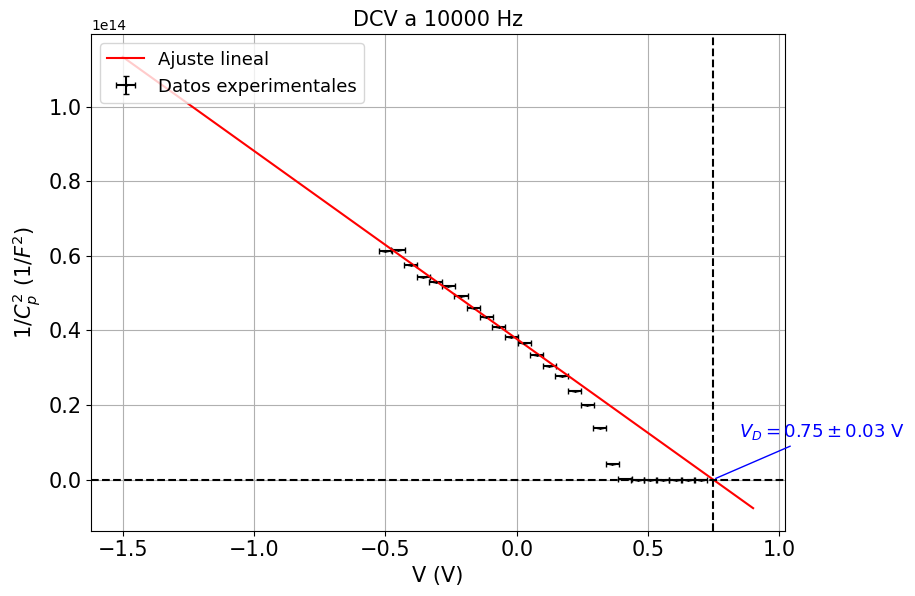

Pendiente_sol: -5.045e+13 ± 1.7e+12
Intersección: 3.773e+13 ± 3.3e+11
V_D: 0.748 ± 0.026 V


In [149]:

data_filt = df_sol

# Filtrar los datos dentro del rango de Vbias [-1.5, 0]
rango = data_filt[(data_filt['V'] >= -0.4) & (data_filt['V'] <= 0.1)]

# Ajuste lineal con matriz de covarianza
coeficientes, cov = np.polyfit(rango['V'], rango['C_inv2_F'], 1, cov=True)
pendiente_sol, interseccion = coeficientes
error_pendiente_sol, error_interseccion = np.sqrt(np.diag(cov))

# Calcular V_D y su error
v_bi = -interseccion / pendiente_sol
# Propagación de errores: ΔV_D = sqrt((dV_D/dm * Δm)^2 + (dV_D/db * Δb)^2)
# Donde V_D = -b/m
error_v_bi = np.sqrt(
    (error_interseccion / pendiente_sol)**2 +
    (interseccion * error_pendiente_sol / pendiente_sol**2)**2
)

# Graficar
vbias_ajuste = np.linspace(-1.5, 0.9, 100)
ajuste_lineal = pendiente_sol * vbias_ajuste + interseccion

plt.figure(figsize=(8, 6))
plt.errorbar(data_filt['V'], data_filt['C_inv2_F'], xerr=errV_sol,yerr=errC, marker='.', markersize=2,
             linestyle='', color='k', label='Datos experimentales', capsize=2.5, capthick=1)
plt.plot(vbias_ajuste, ajuste_lineal, color='red', linestyle='-', label='Ajuste lineal')

plt.title(f'DCV a {frec} Hz', fontsize=15)
plt.ylabel(r'$1/C_p^2\ (1/F^2)$', fontsize=15)
plt.xlabel('V (V)', fontsize=15)
plt.legend(loc='upper left', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.axhline(0, color='k', ls='--')
plt.axvline(v_bi, color='k', ls='--')
plt.tick_params(axis='both', which='major', labelsize=15)

# Etiqueta de V_D con flecha
plt.annotate(
    f'$V_{{D}} = {v_bi:.2f} \pm {error_v_bi:.2f}$ V',
    xy=(v_bi, 0), xycoords='data',
    xytext=(v_bi + 0.1, max(ajuste_lineal) * 0.1),
    textcoords='data',
    arrowprops=dict(arrowstyle="-", color='blue'),
    fontsize=13, color='blue'
)

plt.show()

# Imprimir resultados
print(f"Pendiente_sol: {pendiente_sol:.3e} ± {error_pendiente_sol:.1e}")
print(f"Intersección: {interseccion:.3e} ± {error_interseccion:.1e}")
print(f"V_D: {v_bi:.3f} ± {error_v_bi:.3f} V")


In [150]:
# Constantes
q = 1.6e-19         # C
epsilon = 1.034e-12 # F/m
A = 4               # Área en mm^2 (o en unidades coherentes con ε)
dA = 0.05            # Error en el área (por ejemplo)
m = pendiente_sol       # Pendiente_sol (negativa)
dm = error_pendiente_sol  # Error en la pendiente_sol

# Cálculo del número de portadores
N_portadores_sol = 2 / (q * epsilon * A**2 * -m)

# Derivadas parciales
dN_dm = 2 / (q * epsilon * A**2 * m**2)
dN_dA = -4 / (q * epsilon * A**3 * m)

# Error total propagado
error_N = np.sqrt((dN_dm * dm)**2 + (dN_dA * dA)**2)

# Mostrar resultado
print(f"Número de portadores: {N_portadores_sol:.3e} ± {error_N:.2e} cm⁻³")


Número de portadores: 1.498e+16 ± 6.23e+14 cm⁻³
